# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [3]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import precision_score, accuracy_score, classification_report

from Code_practicals_6 import *

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [4]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1235)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

c:\Users\20212077\.conda\envs\8dm50\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\20212077\.conda\envs\8dm50\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


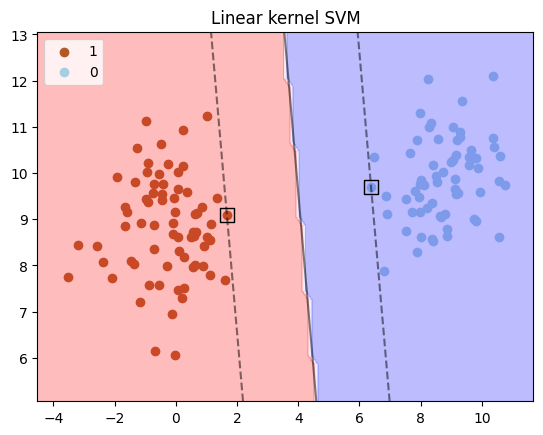

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

c:\Users\20212077\.conda\envs\8dm50\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\20212077\.conda\envs\8dm50\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


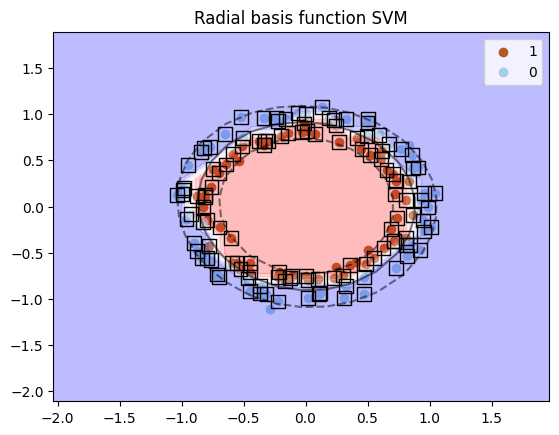

In [6]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf',gamma = 0.5 , random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial basis function SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

A linear kernel is best for linearly separable data, especially when there are many features. For RBF, non-linear data is a better option. RBF can map the data into higher dimensions, which can lead to more complex decision boundaries that can be captured.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

Yes, normalization of the data before using a kernel function is necessary. Features with larger magnitudes can have an uneven influence on the model compared to features with smaller magnitudes. By normalizing, it ensures that all features contribute equally.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [7]:
# Preparing a stratified training / testing split
stratify = drug_response.copy()
stratify[stratify > 0] = 1
stratify[stratify <= 0] = 0

# Splitting data into training and test set
X_train, X_test, Y_train_reg, Y_test_reg = train_test_split(gene_expression, drug_response, test_size=0.25, stratify=stratify, random_state=333)

# Class labels for classification
Y_train_class = Y_train_reg.copy()
Y_train_class[Y_train_class > 0] = 1
Y_train_class[Y_train_class <= 0] = 0

Y_test_class = Y_test_reg.copy()
Y_test_class[Y_test_class > 0] = 1
Y_test_class[Y_test_class <= 0] = 0

In [8]:
hyperparam_grid = [{'C': list(np.arange(0.5, 5.5, 0.5)), 'kernel' : ['linear']}, 
                   {'C': list(np.arange(0.5, 5.5, 0.5)), 'kernel' : ['poly'], 'degree': list(np.arange(2,6,1)), 'coef0': list(np.arange(0,6,1)), 'gamma' : list(np.linspace(0.001,0.1,10))},
                   {'C': list(np.arange(0.5, 5.5, 0.5)), 'kernel' : ['rbf'],'gamma' : list(np.linspace(0.001,0.1,10))},
                   {'C': list(np.arange(0.5, 5.5, 0.5)), 'kernel' : ['sigmoid'], 'coef0': list(np.arange(0,6,1)), 'gamma' : list(np.linspace(0.001,0.1,10))}]

best_hyperpars, best_model = hyperparameter_selection(X_train, X_test, Y_train_class.values.ravel(), Y_test_class.values.ravel(), hyperparam_grid)

Fitting 5 folds for each of 3110 candidates, totalling 15550 fits


In [9]:
print(best_hyperpars)
print(best_model)

{'C': 1.5, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1.5, gamma=0.001)


Sensitivity: 0.12
Specificity: 1.00


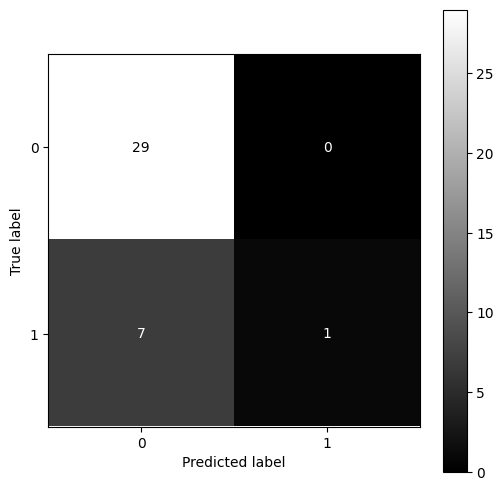

In [10]:
model = svm.SVC(kernel='rbf', C=1.5, gamma = 0.001, random_state=33)
model.fit(X_train, Y_train_class.values.ravel())

Y_pred = best_model.predict(X_test)
confusion_mat(Y_test_class.values.ravel(), Y_pred)

In [11]:
score = precision_score(Y_test_class.values.ravel(),Y_pred)
acc = accuracy_score(Y_test_class.values.ravel(),Y_pred)
report = classification_report(Y_test_class.values.ravel(),Y_pred)
print('Precision :', score)
print('Accuracy :', acc)
print(report)

Precision : 1.0
Accuracy : 0.8108108108108109
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        29
         1.0       1.00      0.12      0.22         8

    accuracy                           0.81        37
   macro avg       0.90      0.56      0.56        37
weighted avg       0.85      0.81      0.75        37



## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

The labels of the GDSC dataset are continuous values. After discussion during the guided selfstudy, a classification problem is created by assigning all negative drug response values to class 0 and all positive drug response values to class 1. This division into classes can be done a priori, followed by a RandomForestClassifier model. However, it is also possible to train a RandomForestRegressor model and divide the samples into the classes a posteriori. The outcome of these two methods are compared.

The random forest model has more hyperparameters to tune than the SVM. Therefore, it was decided to use a Bayesian optimization for the hyperparameter selection using Optuna instead of GridSearchCV. Necessary changes were made to the models to deal with the class imbalances.

In [12]:
# Initialize optuna hyperparameter study
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, X_train, Y_train_class.values.ravel()), n_trials=100)

print("Random Forest - Hyperparameter search")
print("-----------------------------------------------")
print(f"best balanced accuracy = {study.best_trial.value}\n")
print("best tree parameters:")
for k, v in study.best_trial.params.items():
    print(k, ":", v)

Random Forest - Hyperparameter search
-----------------------------------------------
best balanced accuracy = 0.7605228758169934

best tree parameters:
n_estimators : 137
max_depth : 85
max_features : sqrt
min_samples_split : 47
min_samples_leaf : 28


## Random Forest Classifier

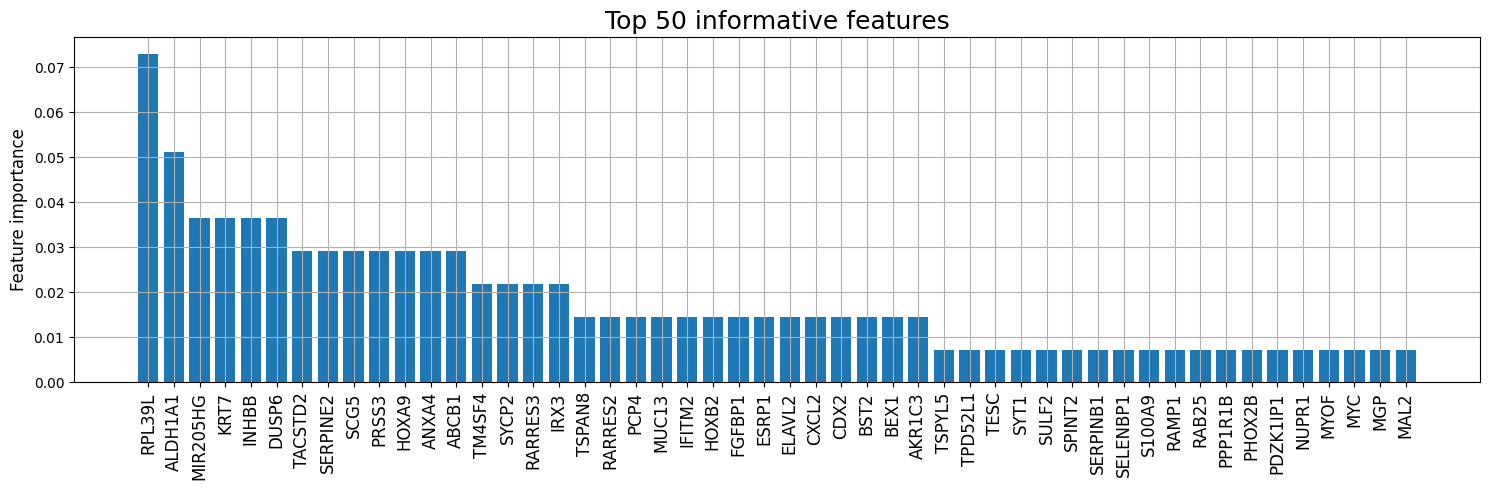

In [13]:
# Train a new model using the best parameters
forest_class = RandomForestClassifier(**study.best_params,
                                      oob_score=True,
                                      bootstrap=True,
                                      random_state=333,
                                      class_weight="balanced_subsample"
)
forest_class.fit(X_train, Y_train_class.values.ravel())

# Plot the feature importances
plot_feature_importance(forest_class, X_train)

Sensitivity: 0.75
Specificity: 0.86
Accuracy: 0.8378378378378378


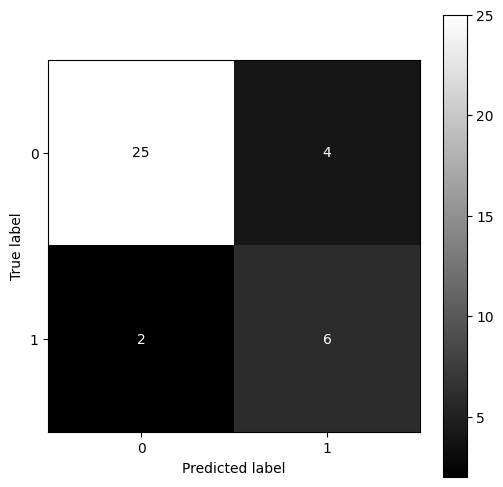

In [14]:
# Model prediction
Y_pred_class = forest_class.predict(X_test)

# Model evaluation
confusion_mat(Y_test_class, Y_pred_class)
acc_class = accuracy_score(Y_test_class, Y_pred_class)
print(f"Accuracy: {acc_class}")

## Random Forest Regressor

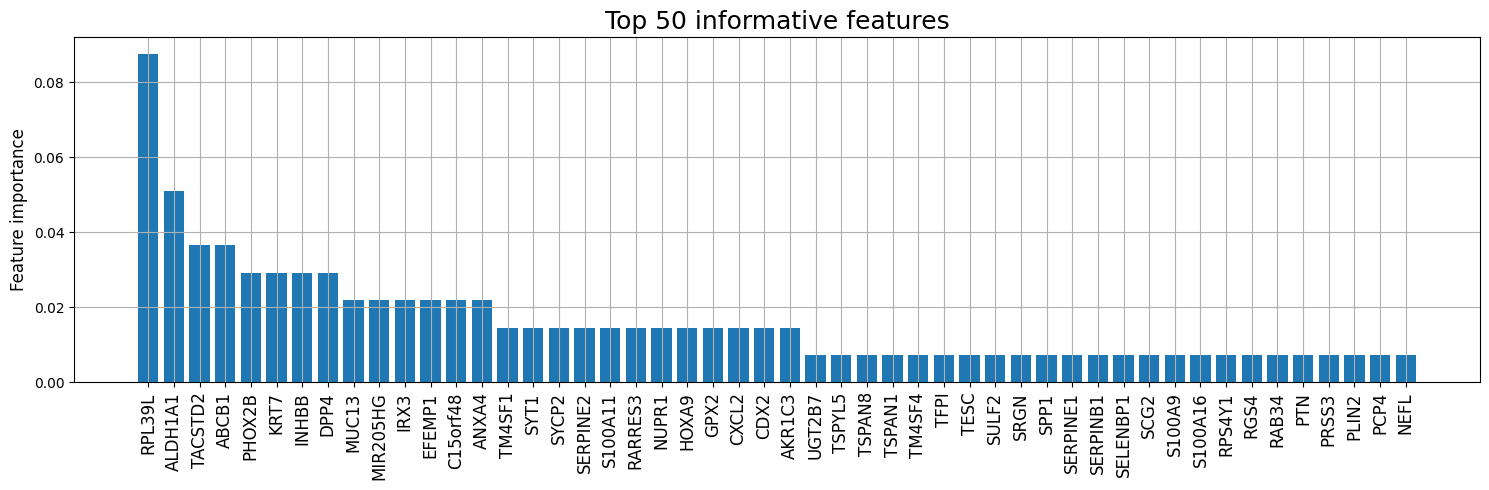

In [21]:
# Defining a suitable weight for the positive values
weight_pos = 14
weights = np.where(Y_train_reg > 0, weight_pos, 1).squeeze()

# Train a new model using the best parameters
forest_reg = RandomForestRegressor(**study.best_params,
                                   oob_score=True,
                                   bootstrap=True,
                                   random_state=333
)
forest_reg.fit(X_train, Y_train_reg.values.ravel(), sample_weight=weights)

# Plot the feature importances
plot_feature_importance(forest_reg, X_train)

Sensitivity: 0.75
Specificity: 0.76
Accuracy: 0.7567567567567568


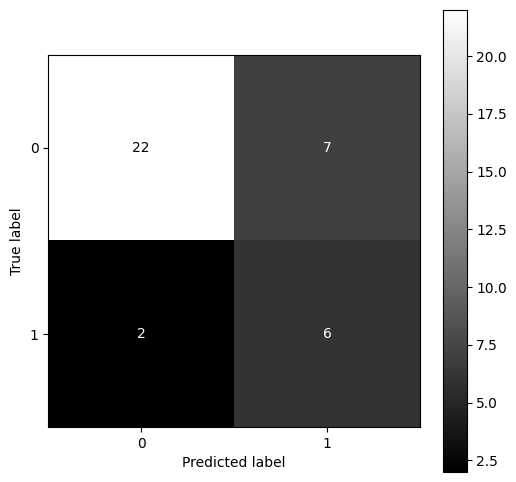

In [22]:
# Model prediction
Y_pred_reg = forest_reg.predict(X_test)
Y_pred_reg[Y_pred_reg > 0] = 1
Y_pred_reg[Y_pred_reg <= 0] = 0

# Model evaluation
confusion_mat(Y_test_class, Y_pred_reg)
acc_reg = accuracy_score(Y_test_class, Y_pred_reg)
print(f"Accuracy: {acc_reg}")

From these models, we can conclude that the Random Forest Classifier was most successful in the classification task compared to the Random Forest Regressor and the Support Vector Machine.



## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

A study by Yu-dong Cay et al. explains the use of SVMs for predicting rRNA-, RNA-, and DNA-binding proteins from amino acid sequences. In the study multiple SVMs are trained that are capable of classifying whether an amino acid sequence belongs to a binding protein or not. In this specific study SVM was used because of the property that it performs well with high dimensional data. Furthermore, the paper mentions that the SVMs were conceived as pattern classification engines. And since patterns are important in sequential DNA as well, using a SVM seems to be a logical choice. 

Source: https://doi.org/10.1016/S1570-9639(03)00112-2

